In [1]:
import pandas as pd
import numpy as np
from algo import numf, get_neighbors
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
df_can = df[df['Country/Region'] == 'Canada']
df_can

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22,10/3/22,10/4/22,10/5/22,10/6/22,10/7/22
40,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,607289,607289,607289,607289,607289,607289,607289,607289,607289,607289
41,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,384266,384900,384900,384900,384900,384900,384900,384900,385599,385599
42,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
44,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,149622,149908,149908,149908,149908,149908,149908,149908,150213,150213
45,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,76902,76902,76902,76902,76902,77460,77460,77460,77460,78056
46,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,51580,51580,51580,51580,51580,51743,51743,51743,51743,51955
47,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
48,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,124511,124511,124511,124511,124511,125474,125474,125474,125474,126598
49,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531


In [4]:
# removing cruise ships
df_can = df_can[~df_can['Province/State'].isin(['Repatriated Travellers', 'Diamond Princess', 'Grand Princess'])]
df_can

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22,10/3/22,10/4/22,10/5/22,10/6/22,10/7/22
40,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,607289,607289,607289,607289,607289,607289,607289,607289,607289,607289
41,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,384266,384900,384900,384900,384900,384900,384900,384900,385599,385599
44,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,149622,149908,149908,149908,149908,149908,149908,149908,150213,150213
45,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,76902,76902,76902,76902,76902,77460,77460,77460,77460,78056
46,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,51580,51580,51580,51580,51580,51743,51743,51743,51743,51955
47,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
48,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,124511,124511,124511,124511,124511,125474,125474,125474,125474,126598
49,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531
50,Ontario,Canada,51.2538,-85.3232,0,2,3,3,3,3,...,1462148,1468342,1468342,1468342,1468342,1468342,1471071,1471071,1477588,1477931
51,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,51410,51410,51410,51410,51410,51410,52047,52047,52047,52047


In [5]:
cum_cases = np.sum(df_can.iloc[:, 4:], axis=0)
plt.plot(cum_cases)

In [6]:
cases = cum_cases - cum_cases.shift(1).fillna(0)
plt.plot(cases)

In [8]:
cases[cases < 0]

4/15/22   -8046.0
8/4/22    -7915.0
dtype: float64

In [9]:
# temporary solution for negative values
cases[cases < 0] = 0

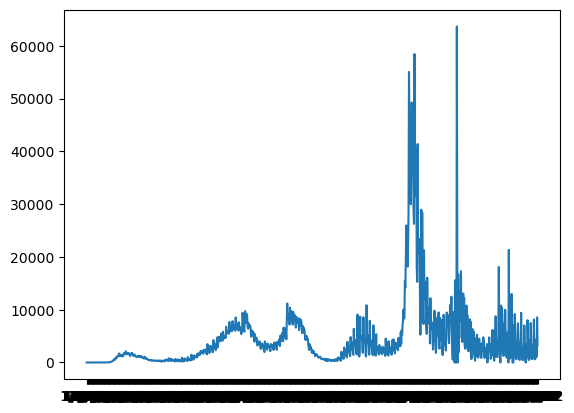

In [10]:
plt.plot(cases)

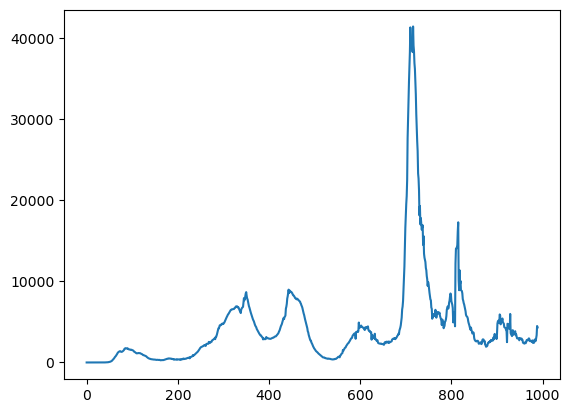

In [11]:
from scipy.ndimage import uniform_filter1d

# Smoothing cases using a 7 day movinh average
cases7d = uniform_filter1d(cases, size=7).reshape(-1, 1)
plt.plot(cases7d)

In [12]:
from scipy.signal import find_peaks

# figure out ideal args
peaks, properties = find_peaks(x=cases7d.reshape(len(cases7d), ), prominence=1, width=10)

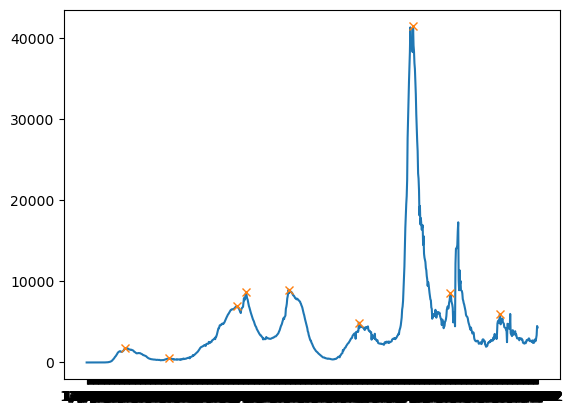

In [13]:
dates = np.array(cases.index)
plt.plot(dates, cases7d)
plt.plot(dates[peaks], cases7d[peaks], 'x')

In [19]:
m, n = cases7d.shape
r = 16
W = np.random.rand(m, r)
H = np.random.rand(r, n)

In [25]:
pd.DataFrame.from_dict({'dates': dates.reshape(-1,), 'cases': cases7d.reshape(-1,)}).to_csv('data/cases.csv', index=False)

In [ ]:
def get_peaks(M, nrad=2):
    (m, n) = M.shape
    all_peaks = list()
    for j in range(n):
        # figure out ideal args
        peaks, _ = find_peaks(x=M[:, j].reshape(m, ), prominence=1, width=10)
        all_peaks.extend(peaks)
    return get_neighbors(all_peaks, m, nrad=nrad)

pvals = get_peaks(cases7d)
W, H = numf(cases7d, W, H, iters=10, peak_vals=pvals)

In [24]:
!ls

NuMF.ipynb
README.md
__pycache__
cases.csv
numf_func.py
test.ipynb
time_series_covid19_confirmed_global.csv
